<a href="https://colab.research.google.com/github/Dulavinya/Pattern_Recognition/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Logistic Regression**

In [4]:
 import seaborn as sns
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score

 # Load the penguins dataset
 df = sns.load_dataset("penguins")
 df.dropna(inplace=True)

 # Filter rows for 'Adelie' and 'Chinstrap' classes
 selected_classes = ['Adelie', 'Chinstrap']
 df_filtered = df[df['species'].isin(selected_classes)].copy()

 # Make a copy to avoid the warning
 # Initialize the LabelEncoder
 le = LabelEncoder()

 # Encode the species column
 y_encoded = le.fit_transform(df_filtered['species'])
 df_filtered['class_encoded'] = y_encoded

 # Display the filtered and encoded DataFrame
 print(df_filtered[['species', 'class_encoded']])

 # Split the data into features (X) and target variable (y)
 y = df_filtered['class_encoded'] # Target variable
 X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [3]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

 #Train the logistic regression model. Here we are using saga
 #solver to learn weights.

 logreg = LogisticRegression(solver='saga')
 logreg.fit(X_train, y_train)

 # Predict on the testing data
 y_pred = logreg.predict(X_test)

 # Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 print("Accuracy:", accuracy)
 print(logreg.coef_, logreg.intercept_)

ValueError: could not convert string to float: 'Adelie'

In [6]:

# Separate features (X) and target (y)
X = df.drop("species", axis=1)   # drop species column → features
y = df["species"]                # target is species (Adelie, Gentoo, Chinstrap)

# Convert categorical columns in X (like 'island', 'sex') to numeric
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression (saga solver handles multinomial)
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:\n", logreg.coef_)
print("Intercept:\n", logreg.intercept_)


Accuracy: 0.6716417910447762
Coefficients:
 [[-1.72292340e-04  1.70961031e-03  6.42152209e-03 -2.55692151e-04
   3.00887240e-05  9.88921105e-05  4.36674439e-05]
 [ 2.39979139e-03  7.09246280e-04  3.63234591e-03 -3.19215574e-04
   1.69024978e-04 -3.51728147e-05  1.96782468e-05]
 [-2.22749905e-03 -2.41885659e-03 -1.00538680e-02  5.74907725e-04
  -1.99113702e-04 -6.37192958e-05 -6.33456907e-05]]
Intercept:
 [ 6.10393643e-05  2.25489777e-05 -8.35883419e-05]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


include feature scaling

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = sns.load_dataset("penguins").dropna()

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Encode categorical features (island, sex) → numeric
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (fit on training, transform both train and test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression (saga handles multinomial)
logreg = LogisticRegression(solver='saga', max_iter=5000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:\n", logreg.coef_)
print("Intercept:\n", logreg.intercept_)


Accuracy: 1.0
Coefficients:
 [[-2.2694797   0.96688743 -0.66527075 -0.14995832 -0.36049896  0.39931255
   0.6686959 ]
 [ 1.86447017  0.19642968 -0.26363464 -0.75677974  1.19895645 -0.13822112
  -0.51911106]
 [ 0.40500954 -1.16331711  0.92890539  0.90673806 -0.83845749 -0.26109143
  -0.14958484]]
Intercept:
 [ 0.76253852 -0.63318492 -0.1293536 ]


In [17]:
# Separate features (X) and target (y)
X = df.drop("species", axis=1)   # drop species column → features
y = df["species"]                # target is species (Adelie, Gentoo, Chinstrap)

# Convert categorical columns in X (like 'island', 'sex') to numeric
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression (saga solver handles multinomial)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:\n", logreg.coef_)
print("Intercept:\n", logreg.intercept_)


Accuracy: 1.0
Coefficients:
 [[-1.21303563e+00  1.96891582e+00  8.46819951e-02  1.96973605e-04
  -4.75452531e-01  5.51533587e-01  4.05404800e-01]
 [ 1.43920930e+00 -1.69116882e-01 -1.78777533e-01 -7.06040700e-03
   6.99523334e-01 -2.59068376e-01 -1.06770745e-01]
 [-2.48712091e-03 -1.75792679e+00  2.65456131e-02  5.38743665e-03
  -1.95446974e-01 -5.55479040e-02 -1.95089908e-01]]
Intercept:
 [ 0.07830714 -0.04338609 -0.03020347]


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = sns.load_dataset("penguins").dropna()

# Separate features (X) and target (y)
X = df.drop("species", axis=1)
y = df["species"]

# Convert categorical columns ('island', 'sex') into numeric form
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for saga, optional for liblinear, but still recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression with liblinear solver
logreg = LogisticRegression(solver="liblinear", max_iter=5000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:\n", logreg.coef_)
print("Intercept:\n", logreg.intercept_)


Accuracy: 1.0
Coefficients:
 [[-3.55424212  1.40115628 -0.94100259 -0.31397565 -0.70165659  0.80156703
   1.11509898]
 [ 3.01664458  0.3297349  -0.32728444 -1.38265698  1.76645394  0.12781233
  -0.72229329]
 [ 0.58313876 -1.94603002  1.39941606  1.43066803 -0.96058692 -0.42364825
  -0.22503807]]
Intercept:
 [-0.73268362 -2.96788859 -1.42796183]


## **Logistic regression First/Second-Order Methods**

Data Generation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Q1: Generate synthetic dataset
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply linear transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add intercept (bias column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Shape = (2000, 3)




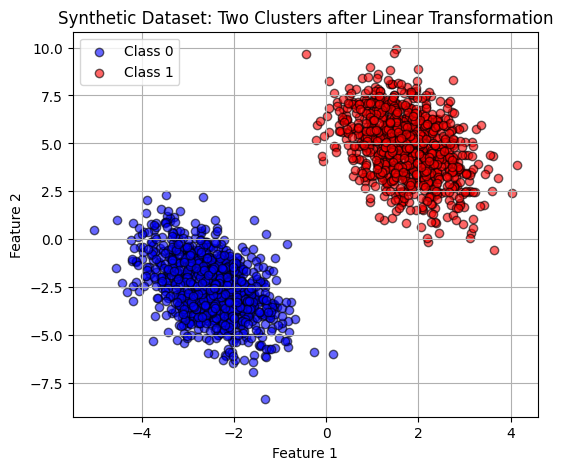

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(X[y==0, 1], X[y==0, 2], c='blue', label="Class 0", alpha=0.6, edgecolors='k')
plt.scatter(X[y==1, 1], X[y==1, 2], c='red', label="Class 1", alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset: Two Clusters after Linear Transformation")
plt.legend()
plt.grid(True)
plt.show()


Batch Gradient Descent (20 iterations)

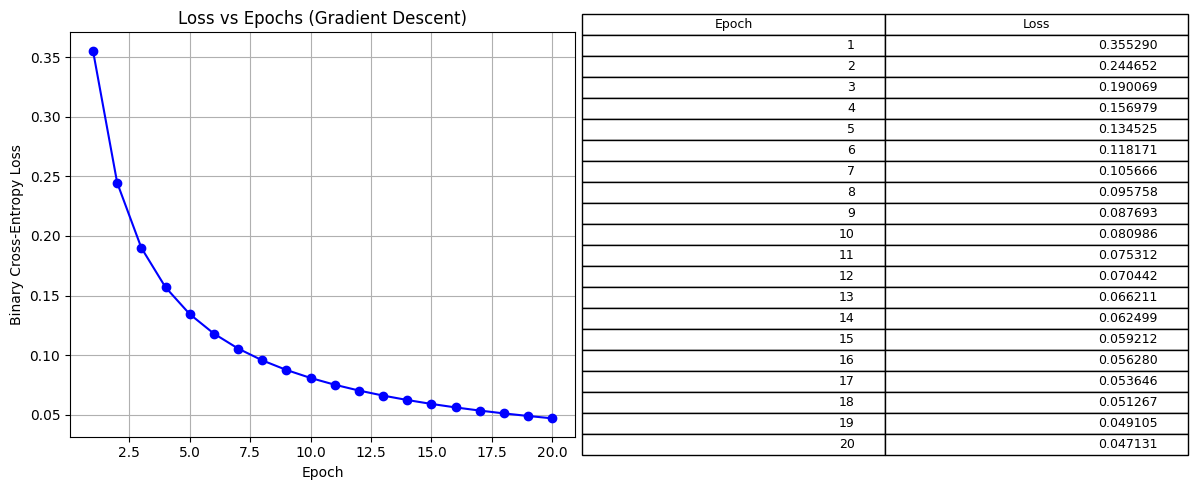

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_fn(X, y, w):
    """Binary cross-entropy loss"""
    y_hat = sigmoid(X @ w)
    return -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

def gradient_descent(X, y, lr=0.1, iters=20):
    # Initialize weights as zeros (convex problem, safe choice)
    w = np.zeros(X.shape[1])
    losses = []

    for _ in range(iters):
        y_hat = sigmoid(X @ w)
        grad = X.T @ (y_hat - y) / X.shape[0]
        w -= lr * grad
        losses.append(loss_fn(X, y, w))
    return w, losses

import matplotlib.pyplot as plt

# Run Gradient Descent
w_gd, losses_gd = gradient_descent(X, y, lr=0.1, iters=20)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# --- Left: Plot loss vs epochs ---
ax1.plot(range(1, len(losses_gd)+1), losses_gd, marker='o', color='blue')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Binary Cross-Entropy Loss")
ax1.set_title("Loss vs Epochs (Gradient Descent)")
ax1.grid(True)

# --- Right: Table of epoch and loss ---
epochs = list(range(1, len(losses_gd)+1))
cell_text = [[e, f"{l:.6f}"] for e, l in zip(epochs, losses_gd)]

ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=cell_text,
                  colLabels=["Epoch", "Loss"],
                  loc="center")
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()



Newton’s Method (20 iterations)

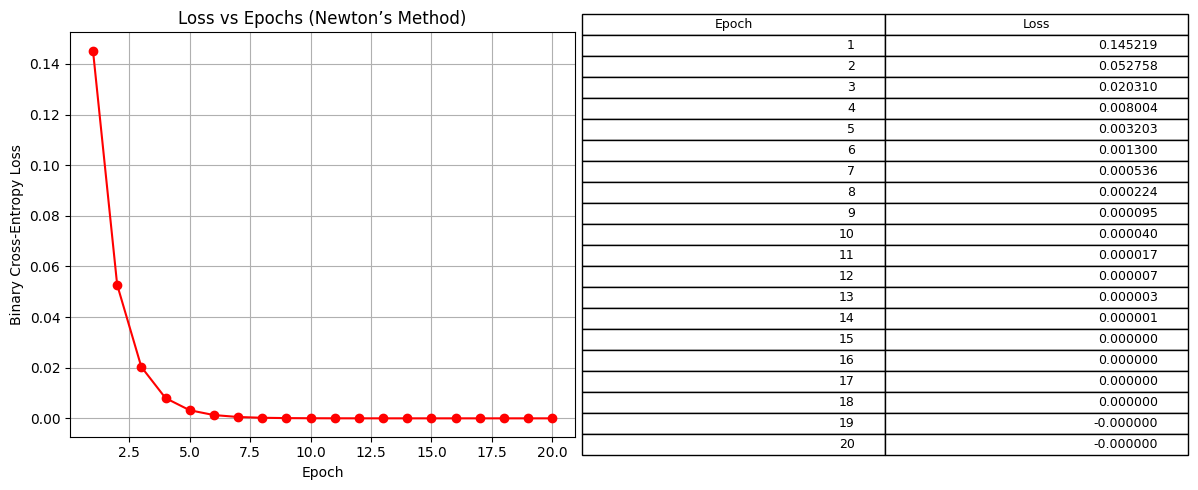

In [16]:
def newtons_method(X, y, iters=20):
    w = np.zeros(X.shape[1])
    losses = []

    for _ in range(iters):
        y_hat = sigmoid(X @ w)
        grad = X.T @ (y_hat - y) / X.shape[0]

        # Hessian matrix
        S = np.diag((y_hat * (1 - y_hat)))
        H = (X.T @ S @ X) / X.shape[0]

        # Newton update
        w -= np.linalg.inv(H) @ grad
        losses.append(loss_fn(X, y, w))
    return w, losses

import matplotlib.pyplot as plt

# Run Newton’s method
w_newton, losses_newton = newtons_method(X, y, iters=20)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# --- Left: Plot loss vs epochs ---
ax1.plot(range(1, len(losses_newton)+1), losses_newton, marker='o', color='red')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Binary Cross-Entropy Loss")
ax1.set_title("Loss vs Epochs (Newton’s Method)")
ax1.grid(True)

# --- Right: Table of epoch and loss ---
epochs = list(range(1, len(losses_newton)+1))
cell_text = [[e, f"{l:.6f}"] for e, l in zip(epochs, losses_newton)]

ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=cell_text,
                  colLabels=["Epoch", "Loss"],
                  loc="center")
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()




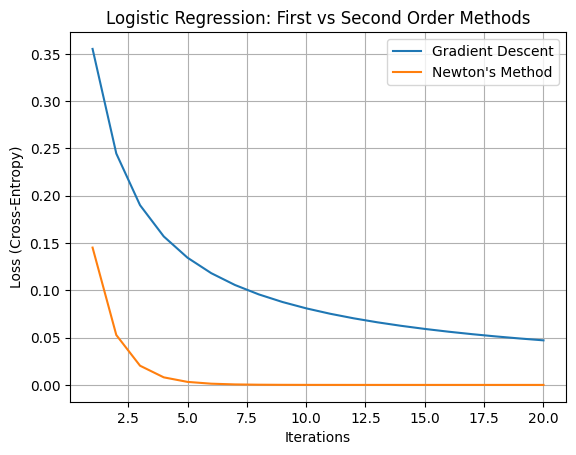

In [23]:
plt.plot(range(1, 21), losses_gd, label="Gradient Descent")
plt.plot(range(1, 21), losses_newton, label="Newton's Method")
plt.xlabel("Iterations")
plt.ylabel("Loss (Cross-Entropy)")
plt.title("Logistic Regression: First vs Second Order Methods")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
print("Two approaches to decide iterations:")
print("1. Stop when loss or gradient norm falls below a threshold (convergence check).")
print("2. Use a validation set (early stopping) when accuracy stops improving.")


Two approaches to decide iterations:
1. Stop when loss or gradient norm falls below a threshold (convergence check).
2. Use a validation set (early stopping) when accuracy stops improving.


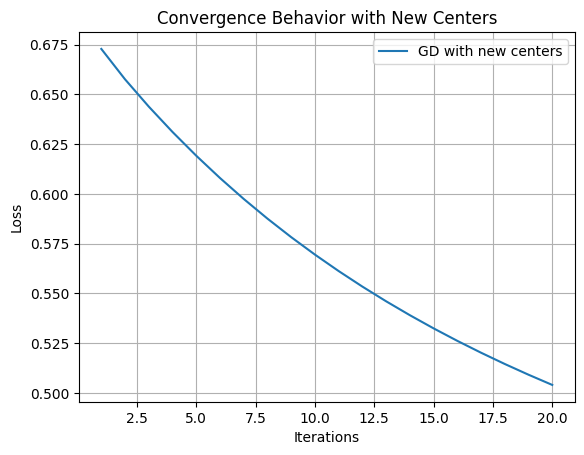

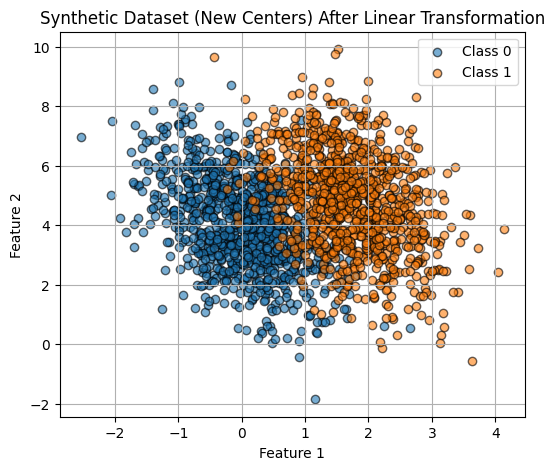

In [15]:
# Generate new data with closer centers
np.random.seed(0)
centers_new = [[2, 2], [5, 1.5]]
X_new, y_new = make_blobs(n_samples=2000, centers=centers_new, random_state=5)
X_new = np.dot(X_new, transformation)
X_new = np.hstack([np.ones((X_new.shape[0], 1)), X_new])

# Run gradient descent on new data
w_gd_new, losses_gd_new = gradient_descent(X_new, y_new, lr=0.1, iters=20)

# Plot new convergence behavior
plt.plot(range(1, 21), losses_gd_new, label="GD with new centers")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Convergence Behavior with New Centers")
plt.legend()
plt.grid(True)
plt.show()
# Visualize the new clusters (skip bias column when plotting)
plt.figure(figsize=(6,5))
plt.scatter(X_new[y_new==0, 1], X_new[y_new==0, 2], label="Class 0", alpha=0.6, edgecolors='k')
plt.scatter(X_new[y_new==1, 1], X_new[y_new==1, 2], label="Class 1", alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset (New Centers) After Linear Transformation")
plt.legend()
plt.grid(True)
plt.show()
